plotting noise cut of pid as a function of prediction

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# multi classification db
path_to_db = "/groups/icecube/peter/storage/Multiclassification/Test/last_one_lvl3MC/dynedge_pid_test_run/results.csv"

# binary classification
everything_real_csv_path = '/groups/icecube/leonbozi/work3/everything_clf_RD.csv'
everything_MC_csv_path = '/groups/icecube/leonbozi/work3/everything_clf_MC.csv'

feature_data = pd.read_csv(path_to_db)

,Unnamed: 0,pid_noise_pred,pid_muon_pred,pid_neutrino_pred,pid,event_no
0,0,9.670935e-01,0.000910,0.031997,-1.0,67057594.0
1,1,1.476296e-09,0.000001,0.999999,-12.0,33761034.0
2,2,6.235220e-01,0.001927,0.374551,-1.0,47840380.0
3,3,1.150592e-02,0.000216,0.988278,12.0,64460786.0
4,4,3.382895e-07,0.000017,0.999983,12.0,493550.0
...,...,...,...,...,...,...
32995,32995,1.027378e-05,0.000209,0.999781,-14.0,23038659.0
32996,32996,1.318803e-11,0.000005,0.999995,12.0,84272295.0
32997,32997,3.247883e-14,0.999994,0.000006,13.0,19864286.0
32998,32998,4.629225e-07,0.998647,0.001352,13.0,69870743.0


In [ ]:
print("unique particle ID's and their count: \n", feature_data[["pid_noise_pred","pid"]].groupby("pid").count())
print()
print("data:")
feature_data

In [97]:
## transform data
# remove anti
feature_data['pid'] = feature_data['pid'].apply(abs)
# make all neutrinos the same class; to match prediction
feature_data.loc[feature_data['pid']==14, "pid"]=12
feature_data.loc[feature_data['pid']==16, "pid"]=12

In [98]:
noise_mu = (feature_data['pid_noise_pred'] > feature_data['pid_muon_pred'])
noise_nu = (feature_data['pid_noise_pred'] > feature_data['pid_muon_pred'])

In [99]:
# cutting percentage
noise_cut = 0.2
mu_cut = 0.2
nu_cut = 0.2

# cut noise
noise = (feature_data['pid_noise_pred'] > feature_data['pid_muon_pred'])
noise = (feature_data['pid_noise_pred'] > feature_data['pid_neutrino_pred'])

feature_data['pid_muon_pred'] = feature_data['pid_muon_pred'].loc[feature_data['pid_muon_pred'] > noise_mu]
feature_data['pid_neutrino_pred'] = feature_data['pid_neutrino_pred'].loc[feature_data['pid_neutrino_pred'] > noise_nu]
feature_data

,Unnamed: 0,pid_noise_pred,pid_muon_pred,pid_neutrino_pred,pid,event_no
0,0,9.670935e-01,NaN,NaN,1.0,67057594.0
1,1,1.476296e-09,0.000001,0.999999,12.0,33761034.0
2,2,6.235220e-01,NaN,NaN,1.0,47840380.0
3,3,1.150592e-02,NaN,NaN,12.0,64460786.0
4,4,3.382895e-07,0.000017,0.999983,12.0,493550.0
...,...,...,...,...,...,...
32995,32995,1.027378e-05,0.000209,0.999781,12.0,23038659.0
32996,32996,1.318803e-11,0.000005,0.999995,12.0,84272295.0
32997,32997,3.247883e-14,0.999994,0.000006,13.0,19864286.0
32998,32998,4.629225e-07,0.998647,0.001352,13.0,69870743.0


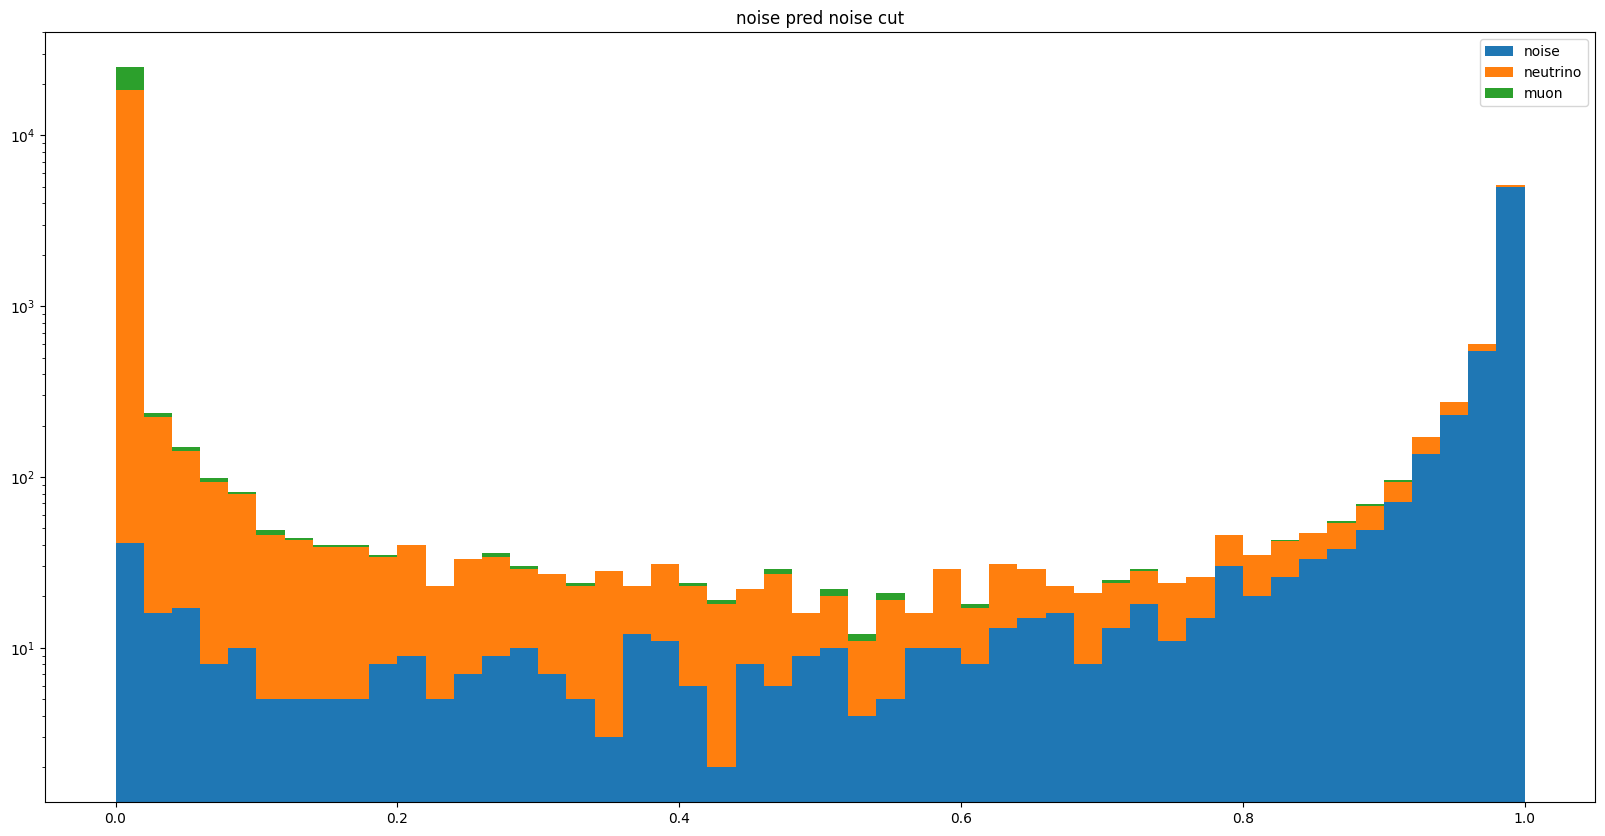

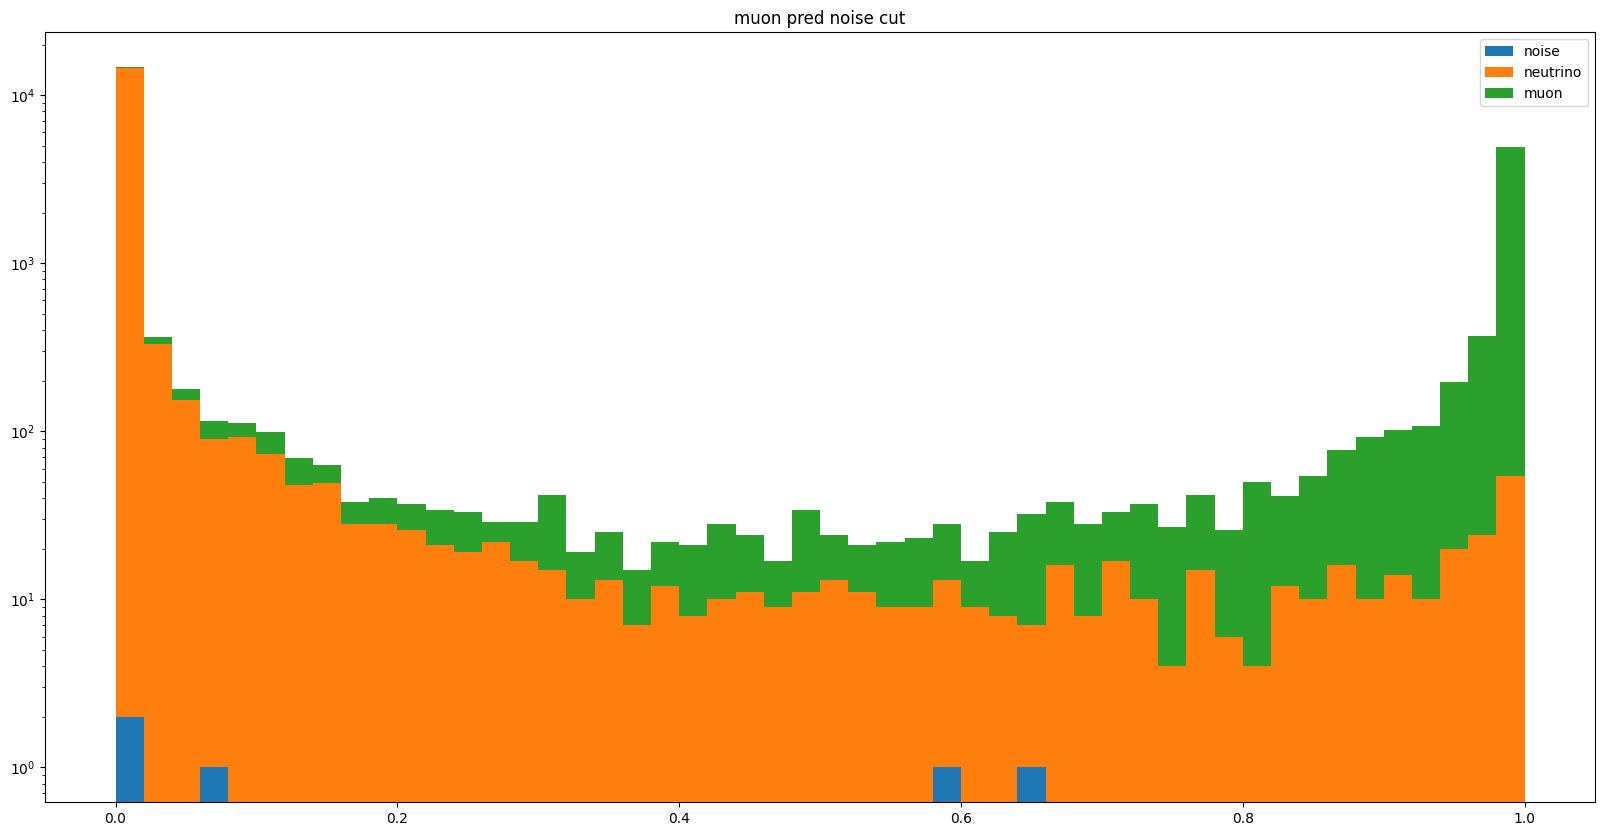

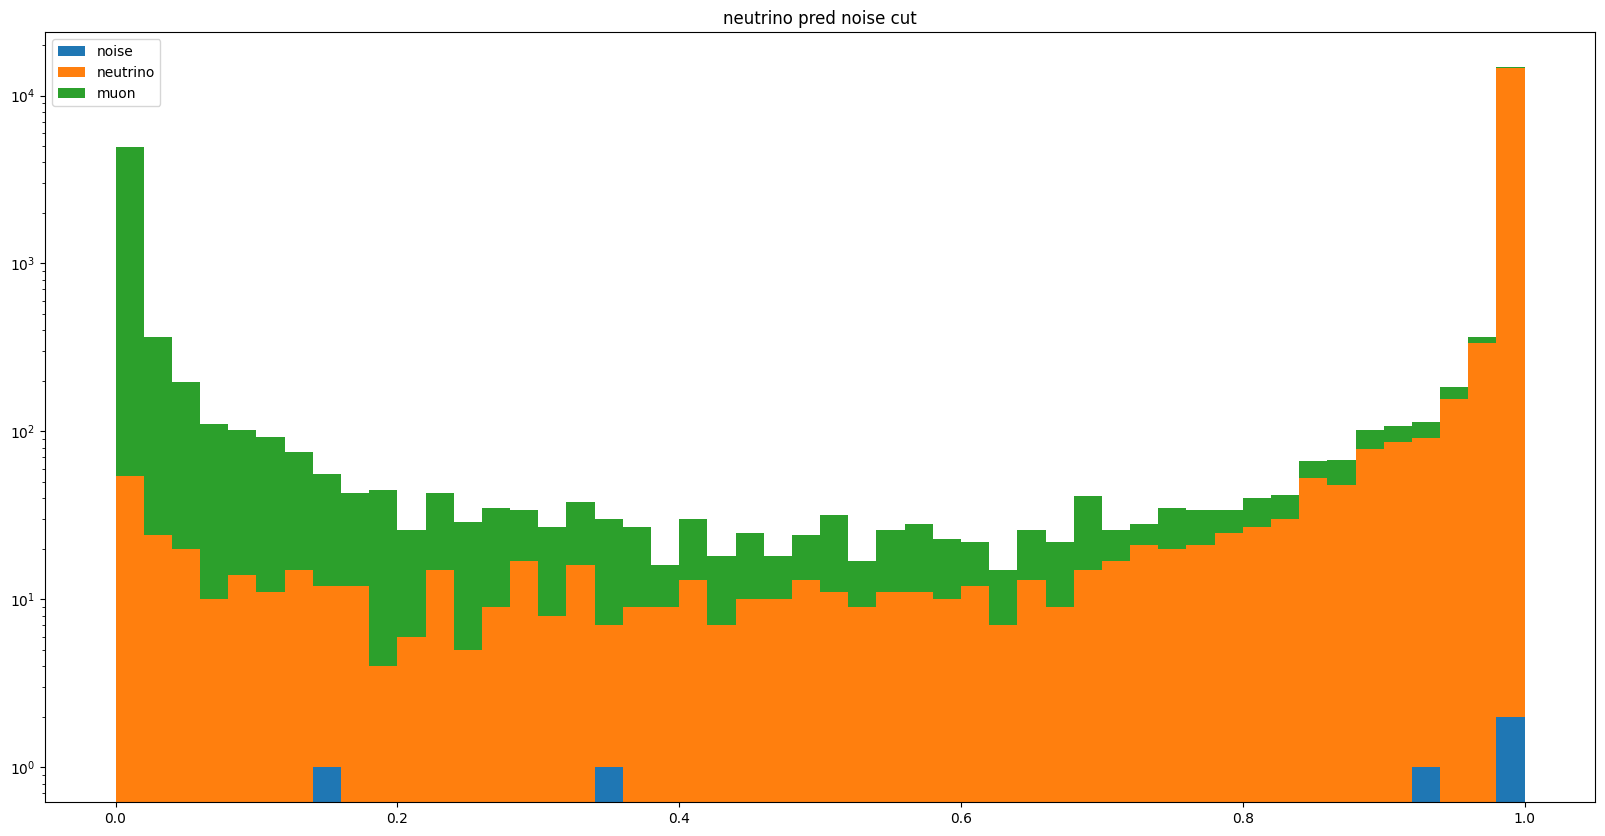

In [100]:
preds = ["pid_noise_pred","pid_muon_pred","pid_neutrino_pred"]
pids = [1,12,13]
for pred in preds:
    pid_list=[]
    plt.figure(figsize=(20,10))
    for pid in pids:
        pid_list.append(feature_data[pred].loc[feature_data["pid"]==pid])
    plt.hist(pid_list, bins=50, log=True, stacked=True, label=("noise", "neutrino", "muon"))
    plt.title(pred.replace("_"," ")[4:]+f" noise cut")
    plt.legend()
    plt.savefig("/groups/icecube/qgf305/workspace/analyses/multi_classification_on_stop_and_track_muons/plotting/distributions/test_plot/"+pred.replace("_","")[3:-4]+"_noiseCut.png")